In [1]:
import pandas as pd
import numpy as np

# Load the dataset
data = pd.read_csv('cars.csv')

# Display the first few rows of the dataset
data.head()

,index,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,...,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,0,3/24/2016 11:52,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,...,golf,150000,0,benzin,volkswagen,NaN,3/24/2016 0:00,0,70435,4/7/2016 3:16
1,1,3/24/2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,...,NaN,125000,5,diesel,audi,ja,3/24/2016 0:00,0,66954,4/7/2016 1:46
2,2,3/14/2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,...,grand,125000,8,diesel,jeep,NaN,3/14/2016 0:00,0,90480,4/5/2016 12:47
3,3,3/17/2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,...,golf,150000,6,benzin,volkswagen,nein,3/17/2016 0:00,0,91074,3/17/2016 17:40
4,4,3/31/2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,...,fabia,90000,7,diesel,skoda,nein,3/31/2016 0:00,0,60437,4/6/2016 10:17


In [2]:
# Calculate the percentage of missing values for each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
missing_percentage.sort_values(ascending=False)

notRepairedDamage      19.990055
vehicleType            11.337643
fuelType                9.398309
gearbox                 5.917454
model                   5.171556
index                   0.000000
kilometer               0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
powerPS                 0.000000
dateCrawled             0.000000
yearOfRegistration      0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
name                    0.000000
lastSeen                0.000000
dtype: float64

In [3]:
# Fill missing values with mode
data['vehicleType'].fillna(data['vehicleType'].mode()[0], inplace=True)
data['model'].fillna(data['model'].mode()[0], inplace=True)

# Check again for missing values
missing_percentage_updated = (data.isnull().sum() / len(data)) * 100
missing_percentage_updated.sort_values(ascending=False)

notRepairedDamage      19.990055
fuelType                9.398309
gearbox                 5.917454
index                   0.000000
model                   0.000000
postalCode              0.000000
nrOfPictures            0.000000
dateCreated             0.000000
brand                   0.000000
monthOfRegistration     0.000000
kilometer               0.000000
powerPS                 0.000000
dateCrawled             0.000000
yearOfRegistration      0.000000
vehicleType             0.000000
abtest                  0.000000
price                   0.000000
offerType               0.000000
seller                  0.000000
name                    0.000000
lastSeen                0.000000
dtype: float64

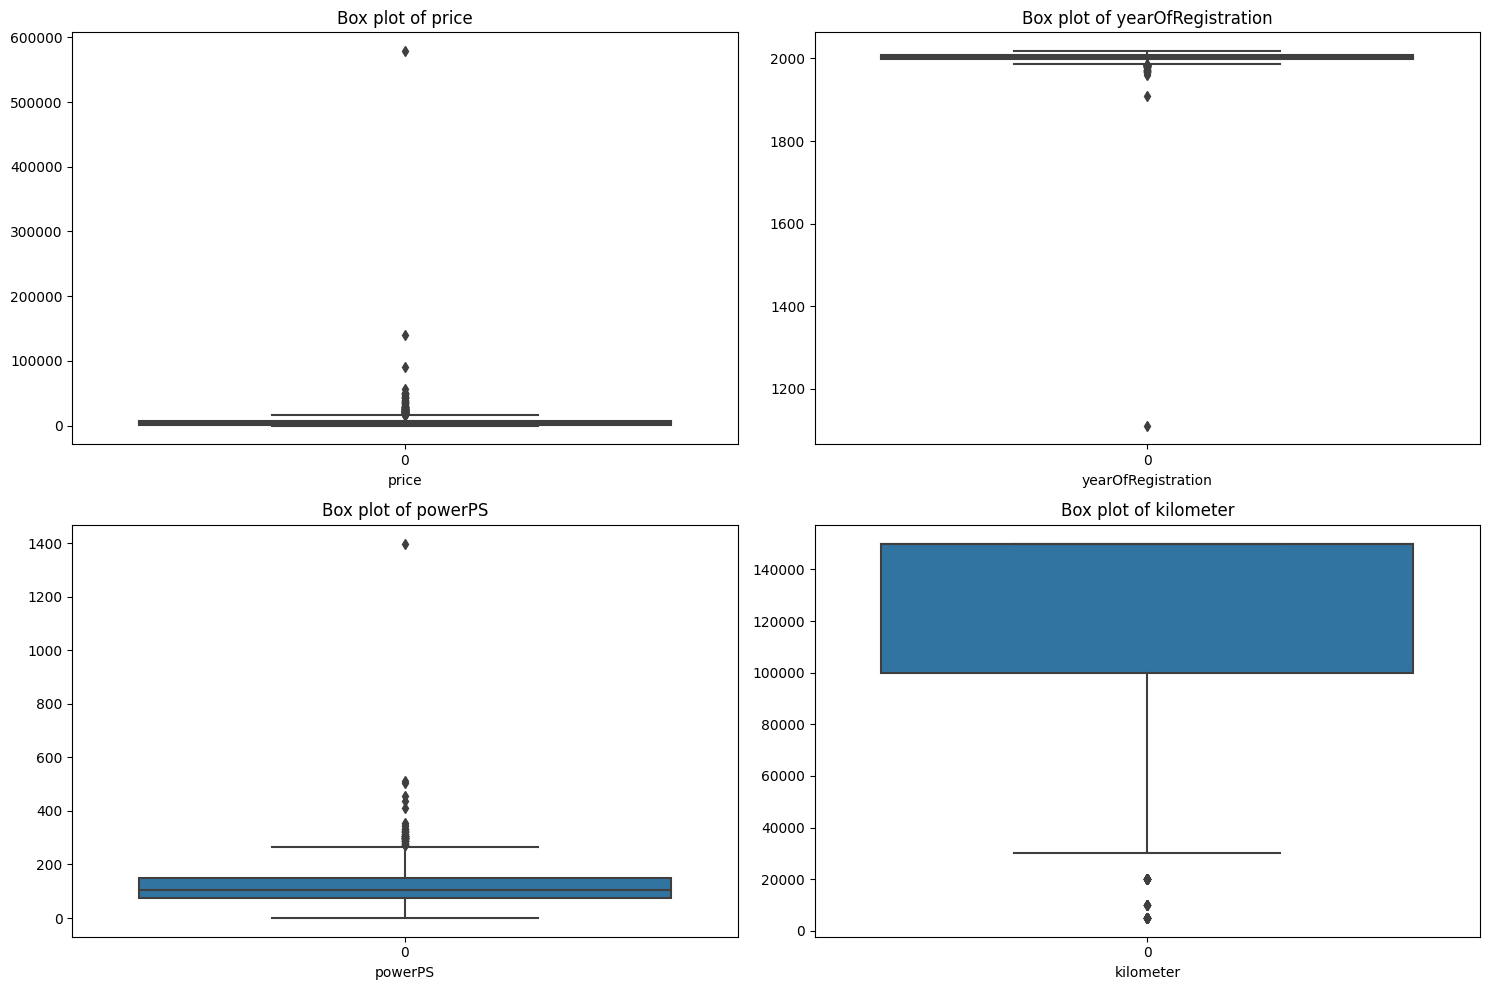

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Drop unnecessary columns
columns_to_drop = ['name', 'dateCrawled', 'dateCreated', 'nrOfPictures', 'postalCode', 'lastSeen']
data_cleaned = data.drop(columns=columns_to_drop)

# Visualize numerical columns to identify outliers
numerical_columns = ['price', 'yearOfRegistration', 'powerPS', 'kilometer']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()

In [5]:
import datetime

# Handle outliers for 'price'
upper_price_limit = data_cleaned['price'].quantile(0.99)
lower_price_limit = 100
data_cleaned = data_cleaned[(data_cleaned['price'] >= lower_price_limit) & (data_cleaned['price'] <= upper_price_limit)]

# Handle outliers for 'yearOfRegistration'
current_year = datetime.datetime.now().year
data_cleaned = data_cleaned[(data_cleaned['yearOfRegistration'] >= 1950) & (data_cleaned['yearOfRegistration'] <= current_year)]

# Handle outliers for 'powerPS'
data_cleaned = data_cleaned[(data_cleaned['powerPS'] >= 10) & (data_cleaned['powerPS'] <= 1000)]

# Display the shape of the cleaned data
data_cleaned.shape

(1696, 15)

In [6]:
# Subset the dataset to include only the selected features and target variable
selected_features = ['kilometer', 'vehicleType', 'fuelType', 'brand', 'powerPS', 'price']
data_subset = data_cleaned[selected_features]

# Display the first few rows of the subsetted data
data_subset.head()

,kilometer,vehicleType,fuelType,brand,powerPS,price
1,125000,coupe,diesel,audi,190,18300
2,125000,suv,diesel,jeep,163,9800
3,150000,kleinwagen,benzin,volkswagen,75,1500
4,90000,kleinwagen,diesel,skoda,69,3600
5,150000,limousine,benzin,bmw,102,650


In [7]:
# Perform one-hot encoding on categorical features
data_encoded = pd.get_dummies(data_subset, columns=['vehicleType', 'fuelType', 'brand'], drop_first=True)

# Display the first few rows of the encoded data
data_encoded.head()

,kilometer,powerPS,price,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
1,125000,190,18300,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,125000,163,9800,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,150000,75,1500,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,90000,69,3600,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False
5,150000,102,650,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
from sklearn.preprocessing import StandardScaler

# Separate the features and target variable
X = data_encoded.drop('price', axis=1)
y = data_encoded['price']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for better visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
X_scaled_df.head()

,kilometer,powerPS,vehicleType_bus,vehicleType_cabrio,vehicleType_coupe,vehicleType_kleinwagen,vehicleType_kombi,vehicleType_limousine,vehicleType_suv,fuelType_benzin,...,brand_seat,brand_skoda,brand_smart,brand_sonstige_autos,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo
0,-0.027034,1.093740,-0.305758,-0.264635,3.912505,-0.510849,-0.483171,-0.729430,-0.183074,-1.257550,...,-0.143029,-0.151391,-0.122316,-0.080797,-0.059584,-0.068843,-0.09759,-0.024289,-0.520012,-0.064378
1,-0.027034,0.630037,-0.305758,-0.264635,-0.255591,-0.510849,-0.483171,-0.729430,5.462267,-1.257550,...,-0.143029,-0.151391,-0.122316,-0.080797,-0.059584,-0.068843,-0.09759,-0.024289,-0.520012,-0.064378
2,0.624246,-0.881291,-0.305758,-0.264635,-0.255591,1.957526,-0.483171,-0.729430,-0.183074,0.795197,...,-0.143029,-0.151391,-0.122316,-0.080797,-0.059584,-0.068843,-0.09759,-0.024289,1.923034,-0.064378
3,-0.938826,-0.984336,-0.305758,-0.264635,-0.255591,1.957526,-0.483171,-0.729430,-0.183074,-1.257550,...,-0.143029,6.605420,-0.122316,-0.080797,-0.059584,-0.068843,-0.09759,-0.024289,-0.520012,-0.064378
4,0.624246,-0.417588,-0.305758,-0.264635,-0.255591,-0.510849,-0.483171,1.370933,-0.183074,0.795197,...,-0.143029,-0.151391,-0.122316,-0.080797,-0.059584,-0.068843,-0.09759,-0.024289,-0.520012,-0.064378


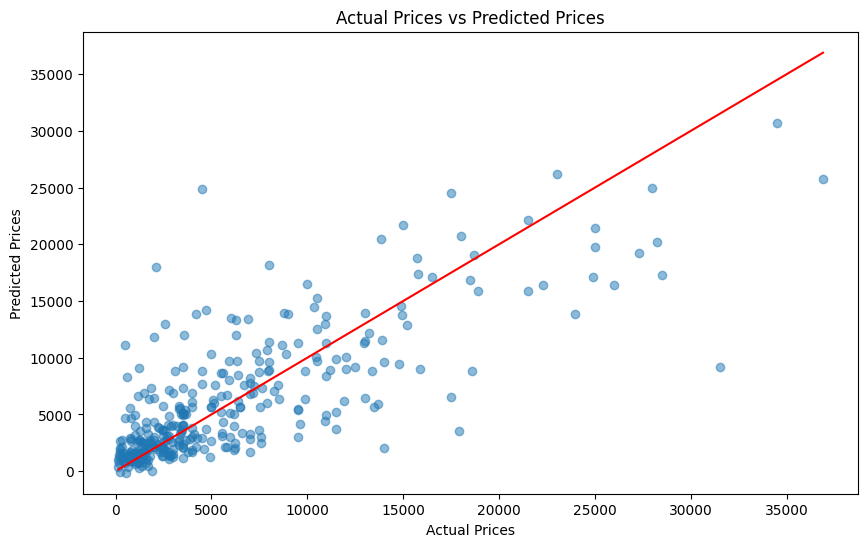

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Training the XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = xgb_model.predict(X_test)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.show()

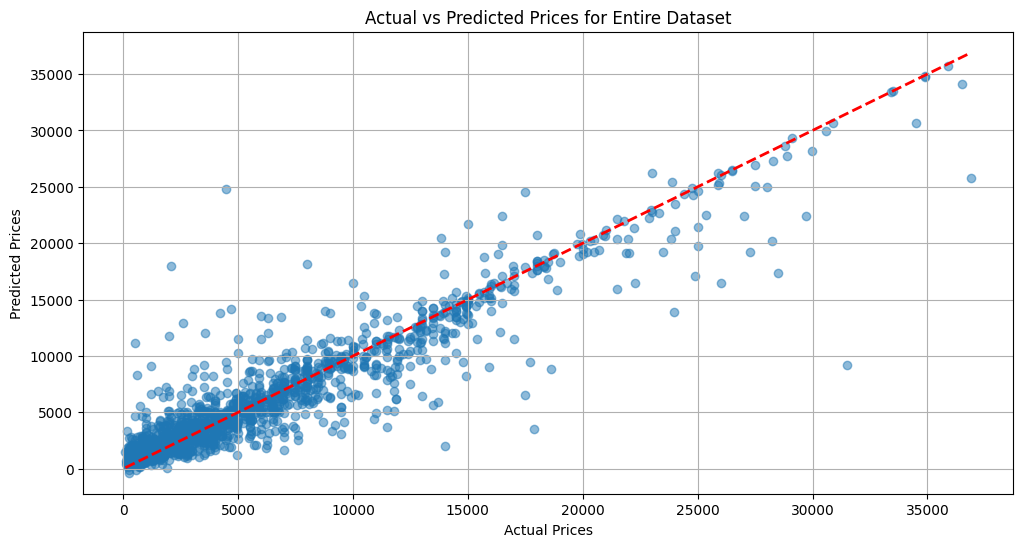

In [11]:
# One-hot encode the entire dataset
X_encoded_reference = pd.get_dummies(X, drop_first=True)

# Scale the entire one-hot encoded dataset
X_encoded_scaled_entire = scaler.transform(X_encoded_reference)

# Predict prices for the entire dataset
entire_data_predictions = xgb_model.predict(X_encoded_scaled_entire)

# Visualize the actual vs predicted prices
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(y, entire_data_predictions, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, color='red')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices for Entire Dataset')
plt.grid(True)
plt.show()

In [12]:
!pip install -q xgboost

In [13]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting on the entire dataset
y_all_pred = xgb_model.predict(X_scaled)

# Calculating evaluation metrics
r2 = r2_score(y, y_all_pred)
mae = mean_absolute_error(y, y_all_pred)
mse = mean_squared_error(y, y_all_pred)
rmse = np.sqrt(mse)

r2, mae, mse, rmse

(0.8753210117498867, 1226.7383819413635, 4642568.582218977, 2154.662057543822)

In [14]:
import pandas as pd

# New data for prediction (within the notebook)
new_data_notebook = pd.DataFrame({
    'yearOfRegistration': [2015],
    'powerPS': [150],
    'kilometer': [50000],
    'fuelType': ['petrol'],
    'brand': ['bmw'],
    'notRepairedDamage': ['no']
})

# One-hot encode the new data
new_data_encoded_notebook = pd.get_dummies(new_data_notebook, drop_first=True)

# One-hot encode the training data again for reference
X_encoded_reference = pd.get_dummies(X, drop_first=True)

# Ensure the new data has the same columns as the training data
missing_cols = set(X_encoded_reference.columns) - set(new_data_encoded_notebook.columns)
for col in missing_cols:
    new_data_encoded_notebook[col] = 0
new_data_encoded_notebook = new_data_encoded_notebook[X_encoded_reference.columns]

# Scale the new data
new_data_scaled_notebook = scaler.transform(new_data_encoded_notebook)

# Predict the price using the xgb_model
predicted_price_notebook = xgb_model.predict(new_data_scaled_notebook)

print(predicted_price_notebook[0])

13492.492


In [15]:
import pickle

# Save the XGBoost model to a file
filename = 'used_car_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(xgb_model, file)

filename

'used_car_model.pkl'